## Import libraries and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import folium
from folium.plugins import FastMarkerCluster

In [2]:
data = pd.read_csv('../input/smart-cities-index-datasets/Smart_City_index_headers.csv')
data

,Id,City,Country,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living,SmartCity_Index,SmartCity_Index_relative_Edmonton
0,1,Oslo,Norway,6480,6512,7516,4565,8618,9090,7138,666
1,2,Bergen,Norway,7097,6876,7350,4905,8050,9090,7296,823
2,3,Amsterdam,Netherlands,7540,5558,8528,8095,7098,7280,7311,839
3,4,Copenhagen,Denmark,7490,7920,8726,5580,5780,7200,7171,698
4,5,Stockholm,Sweden,6122,7692,8354,4330,6743,7730,6812,340
...,...,...,...,...,...,...,...,...,...,...,...
97,98,Riga,Latvia,4152,4584,4616,7380,3745,4330,4712,-1760
98,99,Beijing,China,7610,2998,2806,4905,5183,1980,4449,-2023
99,100,St Petersburg,Russia,4588,2908,3622,4515,5390,4100,4191,-2281
100,101,Calgary,Canada,6675,4052,5946,8022,6424,8657,6678,206


In [3]:
cities = pd.read_csv('../input/world-cities/worldcities.csv')
cities

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37732000.0,1392685764
1,Jakarta,Jakarta,-6.1750,106.8275,Indonesia,ID,IDN,Jakarta,primary,33756000.0,1360771077
2,Delhi,Delhi,28.6100,77.2300,India,IN,IND,Delhi,admin,32226000.0,1356872604
3,Guangzhou,Guangzhou,23.1300,113.2600,China,CN,CHN,Guangdong,admin,26940000.0,1156237133
4,Mumbai,Mumbai,19.0761,72.8775,India,IN,IND,Mahārāshtra,admin,24973000.0,1356226629
...,...,...,...,...,...,...,...,...,...,...,...
44686,Numto,Numto,63.6667,71.3333,Russia,RU,RUS,Khanty-Mansiyskiy Avtonomnyy Okrug-Yugra,NaN,10.0,1643985006
44687,Nord,Nord,81.7166,-17.8000,Greenland,GL,GRL,NaN,NaN,10.0,1304217709
44688,Timmiarmiut,Timmiarmiut,62.5333,-42.2167,Greenland,GL,GRL,Kujalleq,NaN,10.0,1304206491
44689,San Rafael,San Rafael,-16.7795,-60.6799,Bolivia,BO,BOL,Santa Cruz,NaN,NaN,1068405265


In [4]:
continents = pd.read_csv('../input/country-and-continent/country_and_continent.csv')
continents

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
0,Asia,AS,"Afghanistan, Islamic Republic of",AF,AFG,4.0
1,Europe,EU,"Albania, Republic of",AL,ALB,8.0
2,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ,ATA,10.0
3,Africa,AF,"Algeria, People's Democratic Republic of",DZ,DZA,12.0
4,Oceania,OC,American Samoa,AS,ASM,16.0
...,...,...,...,...,...,...
257,Africa,AF,"Zambia, Republic of",ZM,ZMB,894.0
258,Oceania,OC,Disputed Territory,XX,NaN,NaN
259,Asia,AS,Iraq-Saudi Arabia Neutral Zone,XE,NaN,NaN
260,Asia,AS,United Nations Neutral Zone,XD,NaN,NaN


## Data Preprocessing

### data

In [5]:
# Check null values by columns
data.isnull().sum()

Id                                   0
City                                 0
Country                              0
Smart_Mobility                       0
Smart_Environment                    0
Smart_Government                     0
Smart_Economy                        0
Smart_People                         0
Smart_Living                         0
SmartCity_Index                      0
SmartCity_Index_relative_Edmonton    0
dtype: int64

In [6]:
# Check what columns do I have
data.columns

Index(['Id', 'City', 'Country', 'Smart_Mobility ', 'Smart_Environment',
       'Smart_Government ', 'Smart_Economy ', 'Smart_People', 'Smart_Living',
       'SmartCity_Index', 'SmartCity_Index_relative_Edmonton'],
      dtype='object')

In [7]:
# There are some spaces of each column head
# Therefore, we need to remove those
dict_rename = {'Smart_Mobility ': 'Smart_Mobility',
          'Smart_Government ': 'Smart_Government',
          'Smart_Economy ': 'Smart_Economy'
          }
dict_rename

{'Smart_Mobility ': 'Smart_Mobility',
 'Smart_Government ': 'Smart_Government',
 'Smart_Economy ': 'Smart_Economy'}

In [8]:
data.rename(columns=dict_rename, inplace=True)
data

,Id,City,Country,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living,SmartCity_Index,SmartCity_Index_relative_Edmonton
0,1,Oslo,Norway,6480,6512,7516,4565,8618,9090,7138,666
1,2,Bergen,Norway,7097,6876,7350,4905,8050,9090,7296,823
2,3,Amsterdam,Netherlands,7540,5558,8528,8095,7098,7280,7311,839
3,4,Copenhagen,Denmark,7490,7920,8726,5580,5780,7200,7171,698
4,5,Stockholm,Sweden,6122,7692,8354,4330,6743,7730,6812,340
...,...,...,...,...,...,...,...,...,...,...,...
97,98,Riga,Latvia,4152,4584,4616,7380,3745,4330,4712,-1760
98,99,Beijing,China,7610,2998,2806,4905,5183,1980,4449,-2023
99,100,St Petersburg,Russia,4588,2908,3622,4515,5390,4100,4191,-2281
100,101,Calgary,Canada,6675,4052,5946,8022,6424,8657,6678,206


### cities

In [9]:
# Check null values by columns
cities.isnull().sum()

city              0
city_ascii        0
lat               0
lng               0
country           0
iso2             33
iso3              0
admin_name      316
capital       33553
population      307
id                0
dtype: int64

In [10]:
# Remove rows which has nulll values
cities.dropna(axis=0, inplace=True)
cities.reset_index(drop=True, inplace=True)
cities

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37732000.0,1392685764
1,Jakarta,Jakarta,-6.1750,106.8275,Indonesia,ID,IDN,Jakarta,primary,33756000.0,1360771077
2,Delhi,Delhi,28.6100,77.2300,India,IN,IND,Delhi,admin,32226000.0,1356872604
3,Guangzhou,Guangzhou,23.1300,113.2600,China,CN,CHN,Guangdong,admin,26940000.0,1156237133
4,Mumbai,Mumbai,19.0761,72.8775,India,IN,IND,Mahārāshtra,admin,24973000.0,1356226629
...,...,...,...,...,...,...,...,...,...,...,...
10740,Yélimané,Yelimane,15.1180,-10.5720,Mali,ML,MLI,Kayes,minor,988.0,1466380722
10741,Linxi,Linxi,43.5171,118.0333,China,CN,CHN,Inner Mongolia,minor,679.0,1156608652
10742,Gastre,Gastre,-42.2667,-69.2167,Argentina,AR,ARG,Chubut,minor,602.0,1032815504
10743,Telsen,Telsen,-42.3833,-66.9500,Argentina,AR,ARG,Chubut,minor,544.0,1032824407


In [11]:
# Re-Check null values by columns
cities.isnull().sum()

city          0
city_ascii    0
lat           0
lng           0
country       0
iso2          0
iso3          0
admin_name    0
capital       0
population    0
id            0
dtype: int64

### continents

In [12]:
continents.isnull().sum()

Continent_Name                0
Continent_Code               43
Country_Name                  0
Two_Letter_Country_Code       1
Three_Letter_Country_Code     4
Country_Number                4
dtype: int64

In [13]:
# Remove rows which has nulll values
continents.dropna(axis=0, inplace=True)
continents.reset_index(drop=True, inplace=True)
continents

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
0,Asia,AS,"Afghanistan, Islamic Republic of",AF,AFG,4.0
1,Europe,EU,"Albania, Republic of",AL,ALB,8.0
2,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ,ATA,10.0
3,Africa,AF,"Algeria, People's Democratic Republic of",DZ,DZA,12.0
4,Oceania,OC,American Samoa,AS,ASM,16.0
...,...,...,...,...,...,...
209,South America,SA,"Venezuela, Bolivarian Republic of",VE,VEN,862.0
210,Oceania,OC,Wallis and Futuna,WF,WLF,876.0
211,Oceania,OC,"Samoa, Independent State of",WS,WSM,882.0
212,Asia,AS,Yemen,YE,YEM,887.0


## Data Preparation

In [14]:
# Merge two DataFrames
cities_continents = pd.merge(cities, continents, left_on='iso2', right_on='Two_Letter_Country_Code')
cities_continents

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37732000.0,1392685764,Asia,AS,Japan,JP,JPN,392.0
1,Ōsaka,Osaka,34.6939,135.5022,Japan,JP,JPN,Ōsaka,admin,15126000.0,1392419823,Asia,AS,Japan,JP,JPN,392.0
2,Nagoya,Nagoya,35.1833,136.9000,Japan,JP,JPN,Aichi,admin,9197000.0,1392407472,Asia,AS,Japan,JP,JPN,392.0
3,Yokohama,Yokohama,35.4442,139.6381,Japan,JP,JPN,Kanagawa,admin,3757630.0,1392118339,Asia,AS,Japan,JP,JPN,392.0
4,Fukuoka,Fukuoka,33.5833,130.4000,Japan,JP,JPN,Fukuoka,admin,2286000.0,1392576294,Asia,AS,Japan,JP,JPN,392.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10032,Butwāl,Butwal,27.7000,83.4660,Nepal,NP,NPL,Lumbinī,admin,118462.0,1524843250,Asia,AS,"Nepal, State of",NP,NPL,524.0
10033,Janakpur,Janakpur,26.7286,85.9250,Nepal,NP,NPL,Madhesh,admin,97776.0,1524563587,Asia,AS,"Nepal, State of",NP,NPL,524.0
10034,Heṭauḍā,Hetauda,27.4167,85.0333,Nepal,NP,NPL,Bāgmatī,admin,84671.0,1524551914,Asia,AS,"Nepal, State of",NP,NPL,524.0
10035,Godāwari̇̄,Godawari,28.9100,80.5900,Nepal,NP,NPL,Sudūrpashchim,admin,78018.0,1524020578,Asia,AS,"Nepal, State of",NP,NPL,524.0


In [15]:
# Drop unnecessary columns
cities_continents.drop(columns=['city', 'admin_name', 'capital', 'population', 'id', 'Continent_Code', 'Country_Name', 'Two_Letter_Country_Code', 'Three_Letter_Country_Code', 'Country_Number'], inplace=True)
cities_continents

,city_ascii,lat,lng,country,iso2,iso3,Continent_Name
0,Tokyo,35.6897,139.6922,Japan,JP,JPN,Asia
1,Osaka,34.6939,135.5022,Japan,JP,JPN,Asia
2,Nagoya,35.1833,136.9000,Japan,JP,JPN,Asia
3,Yokohama,35.4442,139.6381,Japan,JP,JPN,Asia
4,Fukuoka,33.5833,130.4000,Japan,JP,JPN,Asia
...,...,...,...,...,...,...,...
10032,Butwal,27.7000,83.4660,Nepal,NP,NPL,Asia
10033,Janakpur,26.7286,85.9250,Nepal,NP,NPL,Asia
10034,Hetauda,27.4167,85.0333,Nepal,NP,NPL,Asia
10035,Godawari,28.9100,80.5900,Nepal,NP,NPL,Asia


In [16]:
# Check Null values
cities_continents.isnull().sum()

city_ascii        0
lat               0
lng               0
country           0
iso2              0
iso3              0
Continent_Name    0
dtype: int64

## Visualization

### Bar Plot

In [17]:
# Check unique values of continents
cities_continents['Continent_Name'].unique()

array(['Asia', 'South America', 'Africa', 'Europe', 'Oceania'],
      dtype=object)

In [18]:
# Define variable in order to filter 'cities_continents'
# continent = input('>>> Input Continent Name: ')
# Once uploading on Kaggle, the 'input' doesn't working
# Thus, I defined 'continent' variable as 'Asia' :)
continent = 'Asia'

In [19]:
# We have too muich data on 'cities_continents'
# So, we will figure out continents by continents
cities_continents_filtered = cities_continents[cities_continents['Continent_Name'] == continent]
cities_continents_filtered

,city_ascii,lat,lng,country,iso2,iso3,Continent_Name
0,Tokyo,35.6897,139.6922,Japan,JP,JPN,Asia
1,Osaka,34.6939,135.5022,Japan,JP,JPN,Asia
2,Nagoya,35.1833,136.9000,Japan,JP,JPN,Asia
3,Yokohama,35.4442,139.6381,Japan,JP,JPN,Asia
4,Fukuoka,33.5833,130.4000,Japan,JP,JPN,Asia
...,...,...,...,...,...,...,...
10032,Butwal,27.7000,83.4660,Nepal,NP,NPL,Asia
10033,Janakpur,26.7286,85.9250,Nepal,NP,NPL,Asia
10034,Hetauda,27.4167,85.0333,Nepal,NP,NPL,Asia
10035,Godawari,28.9100,80.5900,Nepal,NP,NPL,Asia


In [20]:
# Prepare DataFrame for Visualization
cities_continents_visualization = pd.merge(data, cities_continents_filtered, left_on='City', right_on='city_ascii')
cities_continents_visualization.drop(['Id', 'SmartCity_Index', 'SmartCity_Index_relative_Edmonton', 'city_ascii', 'country'], axis=1, inplace=True)
cities_continents_visualization

,City,Country,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living,lat,lng,iso2,iso3,Continent_Name
0,Taipei,Taiwan,4978,4366,7044,3310,7858,7350,25.0375,121.5625,TW,TWN,Asia
1,Tokyo,Japan,7787,4516,5476,1800,4158,9320,35.6897,139.6922,JP,JPN,Asia
2,Osaka,Japan,7233,4758,5732,2105,3403,9320,34.6939,135.5022,JP,JPN,Asia
3,Daejeon,South Korea,7018,4192,4304,2250,8635,4710,36.3510,127.3850,KR,KOR,Asia
4,Abu Dhabi,United Arab Emirates,7302,2108,5948,3325,5933,2130,24.4667,54.3667,AE,ARE,Asia
5,Seoul,South Korea,6250,3754,5222,1490,7860,4710,37.5600,126.9900,KR,KOR,Asia
6,Dubai,United Arab Emirates,7280,1850,4142,2395,7125,2130,25.2631,55.2972,AE,ARE,Asia
7,Shanghai,China,6870,2936,3842,4430,4423,1980,31.1667,121.4667,CN,CHN,Asia
8,Moscow,Russia,5015,2772,5078,5030,4143,4100,55.7558,37.6178,RU,RUS,Asia
9,Beijing,China,7610,2998,2806,4905,5183,1980,39.9040,116.4075,CN,CHN,Asia


In [21]:
# Insert "Smart_Total" column in order to compare total index

for i in range(2, 8):
    cities_continents_visualization['Smart_Total'] = np.empty(shape=(len(cities_continents_visualization.index), 1))
    cities_continents_visualization['Smart_Total'] += cities_continents_visualization.iloc[:, i]
    cities_continents_visualization['Smart_Total']

cities_continents_visualization

,City,Country,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living,lat,lng,iso2,iso3,Continent_Name,Smart_Total
0,Taipei,Taiwan,4978,4366,7044,3310,7858,7350,25.0375,121.5625,TW,TWN,Asia,34906.0
1,Tokyo,Japan,7787,4516,5476,1800,4158,9320,35.6897,139.6922,JP,JPN,Asia,33057.0
2,Osaka,Japan,7233,4758,5732,2105,3403,9320,34.6939,135.5022,JP,JPN,Asia,32551.0
3,Daejeon,South Korea,7018,4192,4304,2250,8635,4710,36.3510,127.3850,KR,KOR,Asia,31109.0
4,Abu Dhabi,United Arab Emirates,7302,2108,5948,3325,5933,2130,24.4667,54.3667,AE,ARE,Asia,26746.0
5,Seoul,South Korea,6250,3754,5222,1490,7860,4710,37.5600,126.9900,KR,KOR,Asia,29286.0
6,Dubai,United Arab Emirates,7280,1850,4142,2395,7125,2130,25.2631,55.2972,AE,ARE,Asia,24922.0
7,Shanghai,China,6870,2936,3842,4430,4423,1980,31.1667,121.4667,CN,CHN,Asia,24481.0
8,Moscow,Russia,5015,2772,5078,5030,4143,4100,55.7558,37.6178,RU,RUS,Asia,26138.0
9,Beijing,China,7610,2998,2806,4905,5183,1980,39.9040,116.4075,CN,CHN,Asia,25482.0


In [22]:
# Relocation of columns
cities_continents_visualization = cities_continents_visualization[['City', 'Country', 'Smart_Mobility', 'Smart_Environment', 'Smart_Government', 'Smart_Economy', 'Smart_People', 'Smart_Living', 'Smart_Total', 'lat', 'lng', 'iso2', 'iso3', 'Continent_Name']]
cities_continents_visualization

,City,Country,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living,Smart_Total,lat,lng,iso2,iso3,Continent_Name
0,Taipei,Taiwan,4978,4366,7044,3310,7858,7350,34906.0,25.0375,121.5625,TW,TWN,Asia
1,Tokyo,Japan,7787,4516,5476,1800,4158,9320,33057.0,35.6897,139.6922,JP,JPN,Asia
2,Osaka,Japan,7233,4758,5732,2105,3403,9320,32551.0,34.6939,135.5022,JP,JPN,Asia
3,Daejeon,South Korea,7018,4192,4304,2250,8635,4710,31109.0,36.3510,127.3850,KR,KOR,Asia
4,Abu Dhabi,United Arab Emirates,7302,2108,5948,3325,5933,2130,26746.0,24.4667,54.3667,AE,ARE,Asia
5,Seoul,South Korea,6250,3754,5222,1490,7860,4710,29286.0,37.5600,126.9900,KR,KOR,Asia
6,Dubai,United Arab Emirates,7280,1850,4142,2395,7125,2130,24922.0,25.2631,55.2972,AE,ARE,Asia
7,Shanghai,China,6870,2936,3842,4430,4423,1980,24481.0,31.1667,121.4667,CN,CHN,Asia
8,Moscow,Russia,5015,2772,5078,5030,4143,4100,26138.0,55.7558,37.6178,RU,RUS,Asia
9,Beijing,China,7610,2998,2806,4905,5183,1980,25482.0,39.9040,116.4075,CN,CHN,Asia


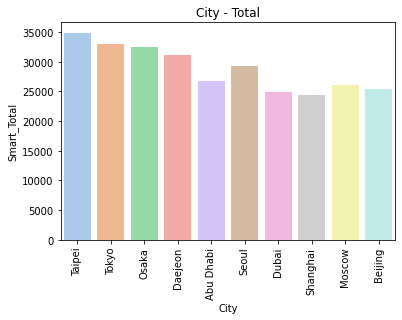

In [23]:
# Display Single Plot
sns.barplot(data=cities_continents_visualization, x='City', y='Smart_Total', palette='pastel')
plt.xticks(rotation=90)
plt.title('City - Total')

plt.show()

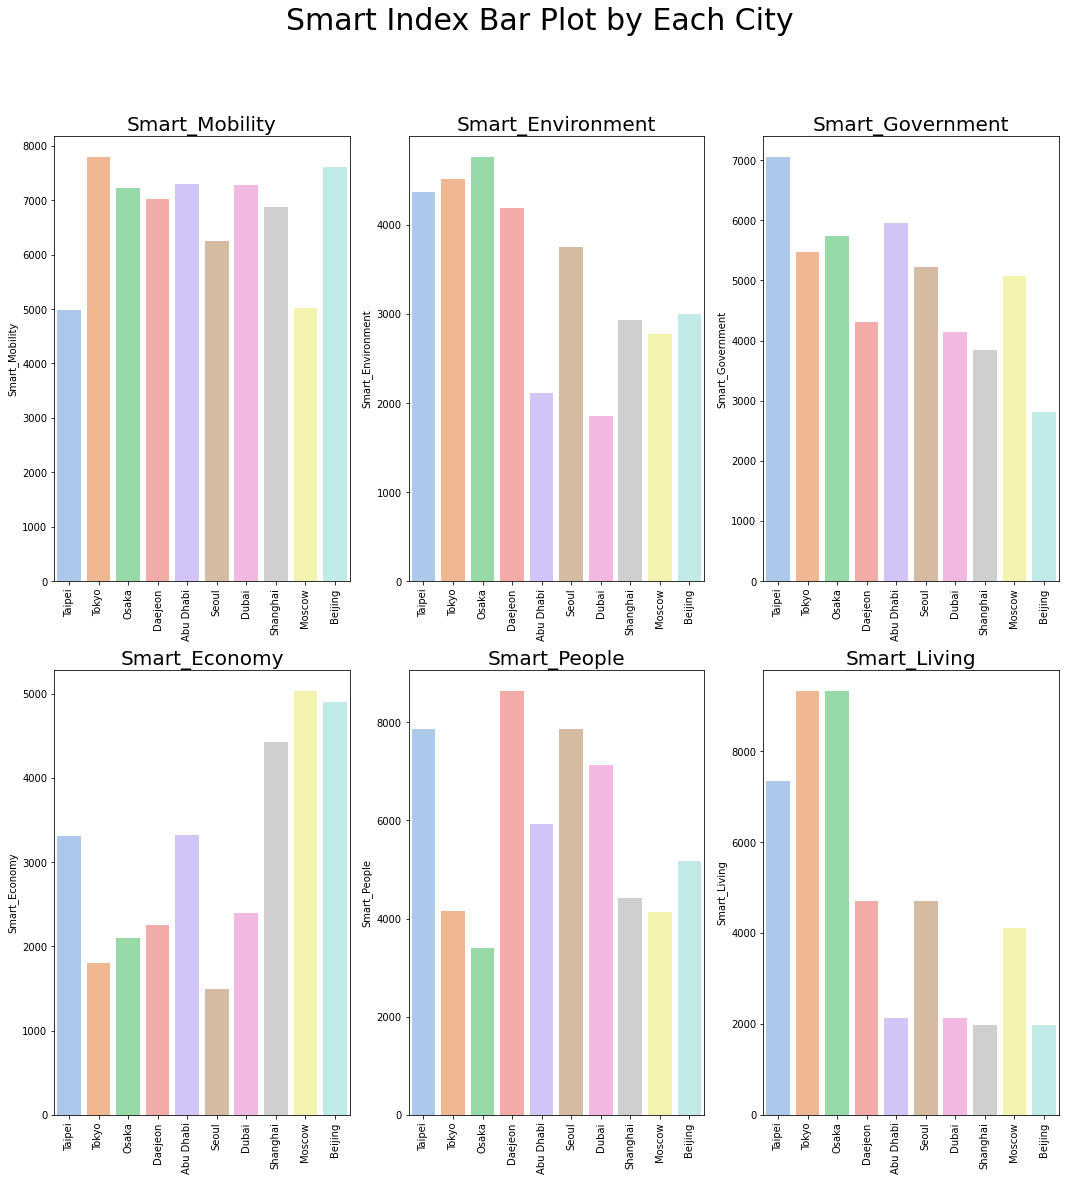

In [24]:
# Display Subplots
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
fig.suptitle('Smart Index Bar Plot by Each City', fontsize=30)
fig.set_size_inches(18, 18)

sns.barplot(data=cities_continents_visualization, x="City", y="Smart_Mobility", palette='pastel', ax=ax1)
sns.barplot(data=cities_continents_visualization, x="City", y="Smart_Environment", palette='pastel', ax=ax2)
sns.barplot(data=cities_continents_visualization, x="City", y="Smart_Government", palette='pastel', ax=ax3)
sns.barplot(data=cities_continents_visualization, x="City", y="Smart_Economy", palette='pastel', ax=ax4)
sns.barplot(data=cities_continents_visualization, x="City", y="Smart_People", palette='pastel', ax=ax5)
sns.barplot(data=cities_continents_visualization, x="City", y="Smart_Living", palette='pastel', ax=ax6)

# Smart_Mobility / ax1
ax1.set(ylabel='Smart_Mobility')
ax1.set_title(label="Smart_Mobility", fontdict={'size': 20})
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set(xlabel=None)

# Smart_Environment / ax2
ax2.set(ylabel='Smart_Environment')
ax2.set_title(label="Smart_Environment", fontdict={'size': 20})
ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax2.set(xlabel=None)

# Smart_Government / ax3
ax3.set(ylabel='Smart_Government')
ax3.set_title(label="Smart_Government", fontdict={'size': 20})
ax3.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax3.set(xlabel=None)

# Smart_Economy / ax4
ax4.set(ylabel='Smart_Economy')
ax4.set_title(label="Smart_Economy", fontdict={'size': 20})
ax4.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax4.set(xlabel=None)

# Smart_People / ax5
ax5.set(ylabel='Smart_People')
ax5.set_title(label="Smart_People", fontdict={'size': 20})
ax5.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax5.set(xlabel=None)

# Smart_Living / ax6
ax6.set(ylabel='Smart_Living')
ax6.set_title(label="Smart_Living", fontdict={'size': 20})
ax6.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax6.set(xlabel=None)

plt.show()

### Heatmap

In [25]:
cities_continents_visualization_copy = cities_continents_visualization.copy()
cities_continents_heatmap = cities_continents_visualization.drop(['Country', 'Smart_Total', 'lat', 'lng', 'iso2', 'iso3'], axis=1, inplace=True)
cities_continents_heatmap

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [26]:
cities_continents_pivot = cities_continents_visualization.pivot(index='City', columns='Continent_Name')
cities_continents_pivot

,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living
Continent_Name,Asia,Asia,Asia,Asia,Asia,Asia
City,,,,,,
Abu Dhabi,7302,2108,5948,3325,5933,2130
Beijing,7610,2998,2806,4905,5183,1980
Daejeon,7018,4192,4304,2250,8635,4710
Dubai,7280,1850,4142,2395,7125,2130
Moscow,5015,2772,5078,5030,4143,4100
Osaka,7233,4758,5732,2105,3403,9320
Seoul,6250,3754,5222,1490,7860,4710
Shanghai,6870,2936,3842,4430,4423,1980


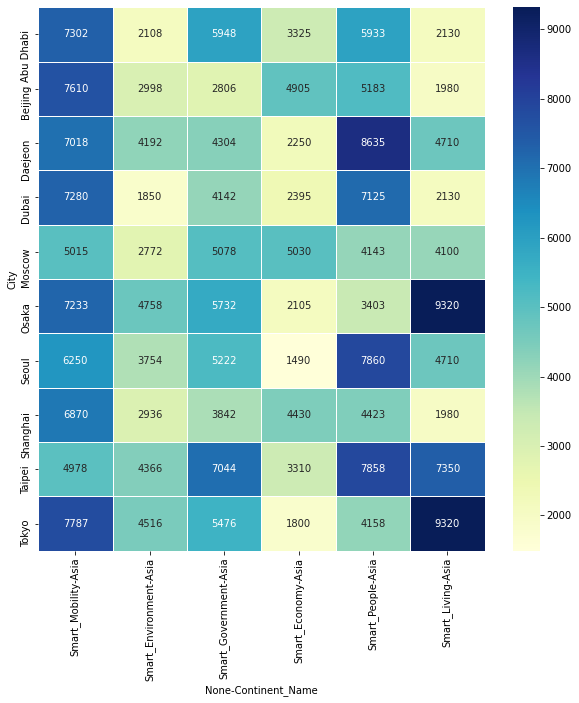

In [27]:
# Heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(data=cities_continents_pivot, annot=True, annot_kws={"size":10},linewidths=.5, cmap="YlGnBu", fmt="")
plt.show()

### Map

In [28]:
# Display a map centered in Asia
map = folium.Map(location=(29, 100), zoom_start=3)
map

In [29]:
cities_continents_visualization_copy

,City,Country,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living,Smart_Total,lat,lng,iso2,iso3,Continent_Name
0,Taipei,Taiwan,4978,4366,7044,3310,7858,7350,34906.0,25.0375,121.5625,TW,TWN,Asia
1,Tokyo,Japan,7787,4516,5476,1800,4158,9320,33057.0,35.6897,139.6922,JP,JPN,Asia
2,Osaka,Japan,7233,4758,5732,2105,3403,9320,32551.0,34.6939,135.5022,JP,JPN,Asia
3,Daejeon,South Korea,7018,4192,4304,2250,8635,4710,31109.0,36.3510,127.3850,KR,KOR,Asia
4,Abu Dhabi,United Arab Emirates,7302,2108,5948,3325,5933,2130,26746.0,24.4667,54.3667,AE,ARE,Asia
5,Seoul,South Korea,6250,3754,5222,1490,7860,4710,29286.0,37.5600,126.9900,KR,KOR,Asia
6,Dubai,United Arab Emirates,7280,1850,4142,2395,7125,2130,24922.0,25.2631,55.2972,AE,ARE,Asia
7,Shanghai,China,6870,2936,3842,4430,4423,1980,24481.0,31.1667,121.4667,CN,CHN,Asia
8,Moscow,Russia,5015,2772,5078,5030,4143,4100,26138.0,55.7558,37.6178,RU,RUS,Asia
9,Beijing,China,7610,2998,2806,4905,5183,1980,25482.0,39.9040,116.4075,CN,CHN,Asia


In [30]:
# Display Circle Marker on the map

for lat, long, total, radius in zip(cities_continents_visualization_copy['lat'], cities_continents_visualization_copy['lng'], cities_continents_visualization_copy['Smart_Total'], cities_continents_visualization_copy['Smart_Total']):
    folium.CircleMarker(
        location=[lat, long],
        radius = radius / 750,
        fill=True,
        fill_opacity=0.3,
        popup=("Total", total)
    ).add_to(map)

map

In [31]:
# FastMarkerCluster

FastMarkerCluster(data=cities_continents_visualization_copy[['lat', 'lng']]).add_to(map)
folium.LayerControl().add_to(map)

map

In [37]:
!pip install shap pdpbox lime cfexplain


ERROR: Could not find a version that satisfies the requirement cfexplain (from versions: none)
ERROR: No matching distribution found for cfexplain


In [39]:
from sklearn.linear_model import LogisticRegression
from lime.lime_tabular import LimeTabularExplainer

# Assuming you have a binary classification task, modify y accordingly
y_binary = (cities_continents_visualization_copy['Smart_Total'] > cities_continents_visualization_copy['Smart_Total'].median()).astype(int)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X, y_binary)

# Use LIME for explanation
explainer = LimeTabularExplainer(X.values, feature_names=X.columns.tolist(), class_names=['Smart_Total'])
explanation = explainer.explain_instance(X.values[0], model.predict_proba, num_features=6)

# Visualize the explanation
explanation.show_in_notebook()

In conclusion, the implementation of Explainable Artificial Intelligence (XAI) in the context of developing a secure and reliable framework for smart city applications is evident in the detailed insights provided by the Local Interpretable Model-agnostic Explanations (LIME) output. The prediction probabilities, highlighted conditions, and feature values offer transparency into the decision-making process of the model, specifically in predicting the "Smart_Total" class. This level of interpretability is crucial for building trust and understanding within the smart city framework. However, the evaluation of the model's overall effectiveness should consider global performance metrics, alignment with application objectives, and user feedback. As we strive for transparency and reliability in smart city AI systems, ongoing refinement and user interaction will be essential to ensure the model's practical utility and ethical implementation.

In [43]:
explanation.as_list()

[('Smart_Living > 6690.00', 0.695231614111048),
 ('Smart_Environment > 4322.50', 0.19773913192039785),
 ('Smart_People > 7674.75', 0.1857830493147934),
 ('Smart_Mobility <= 6405.00', 0.13647081444088088),
 ('Smart_Government > 5668.00', -0.09185239782868802),
 ('2852.50 < Smart_Economy <= 4153.75', -0.039133080500545946)]

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Assuming 'your_target_column' is the column you want to predict
X = cities_continents_visualization_copy[['Smart_Mobility', 'Smart_Environment', 'Smart_Government', 'Smart_Economy', 'Smart_People', 'Smart_Living']]
y = y_binary  # Use the binary classification labels created earlier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming you have a LogisticRegression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate model performance metrics
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")


Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000


**Random forest Regressor SHAP**

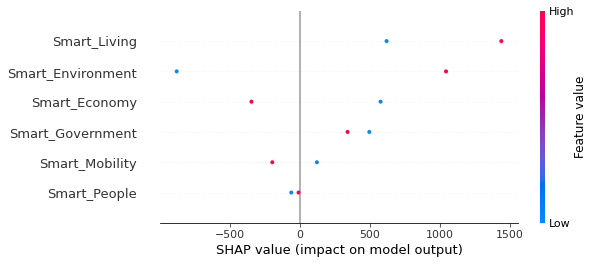

In [44]:
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Assuming your dataset is stored in a DataFrame called 'df'
# Replace 'your_target_column' with the actual target column name

# Assuming 'your_target_column' is the column you want to predict
X = cities_continents_visualization_copy[['Smart_Mobility', 'Smart_Environment', 'Smart_Government', 'Smart_Economy', 'Smart_People', 'Smart_Living']]
y = cities_continents_visualization_copy['Smart_Total']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming you have a RandomForestRegressor model
model = RandomForestRegressor()

# Fit the model on the training data
model.fit(X_train, y_train)

# Create an explainer object
explainer = shap.Explainer(model)

# Generate SHAP values for the first 10 instances in the test set
shap_values = explainer.shap_values(X_test.iloc[:10])

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_test.iloc[:10])


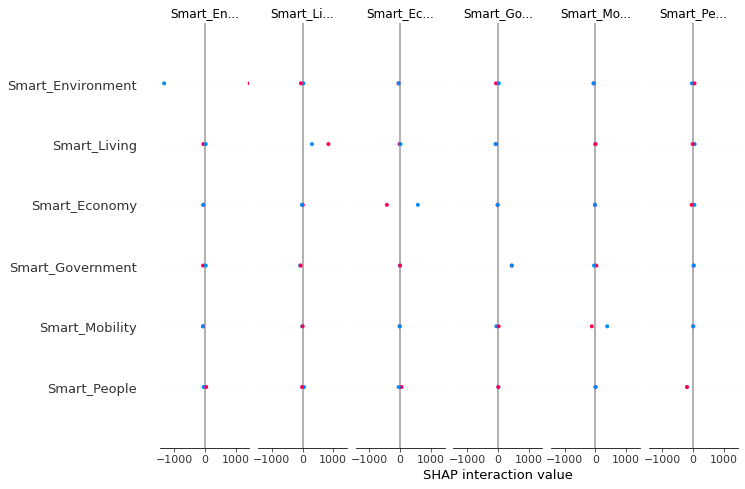

In [45]:
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Assuming your dataset is stored in a DataFrame called 'df'
# Replace 'your_target_column' with the actual target column name

# Assuming 'your_target_column' is the column you want to predict
X = cities_continents_visualization_copy[['Smart_Mobility', 'Smart_Environment', 'Smart_Government', 'Smart_Economy', 'Smart_People', 'Smart_Living']]
y = cities_continents_visualization_copy['Smart_Total']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming you have a RandomForestRegressor model
model = RandomForestRegressor()

# Fit the model on the training data
model.fit(X_train, y_train)

# Create an explainer object
explainer = shap.Explainer(model)

# Generate SHAP interaction values for the first 10 instances in the test set
shap_interaction_values = explainer.shap_interaction_values(X_test.iloc[:10])

# Plot the SHAP interaction value summary plot
shap.summary_plot(shap_interaction_values, X_test.iloc[:10], plot_type="interaction")
